# World Happiness Report

https://www.kaggle.com/datasets/unsdsn/world-happiness/data

Jeśli niektóre wykresy się nie wyświetlają: https://colab.research.google.com/drive/1LjUCVZPRfyGBKUNa7ptVMoXhYyuf0mNF?usp=sharing

The World Happiness Report is a landmark survey of the state of global happiness. The first report was published in 2012, the second in 2013, the third in 2015, and the fourth in the 2016 Update. The World Happiness 2017, which ranks 155 countries by their happiness levels, was released at the United Nations at an event celebrating International Day of Happiness on March 20th. The report continues to gain global recognition as governments, organizations and civil society increasingly use happiness indicators to inform their policy-making decisions. Leading experts across fields – economics, psychology, survey analysis, national statistics, health, public policy and more – describe how measurements of well-being can be used effectively to assess the progress of nations. The reports review the state of happiness in the world today and show how the new science of happiness explains personal and national variations in happiness.

In [46]:

import kagglehub

# Download latest version
path = kagglehub.dataset_download("unsdsn/world-happiness")

print("Path to dataset files:", path)

Path to dataset files: /root/.cache/kagglehub/datasets/unsdsn/world-happiness/versions/2


In [47]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.graphics.mosaicplot import mosaic
import seaborn as sns
import plotly.graph_objs as gobj
import plotly
from plotly.offline import iplot

df19 = pd.read_csv(path + '/2019.csv')
df19.name = 'data19'
df18 = pd.read_csv(path + '/2018.csv')
df18.name = 'data18'
df17 = pd.read_csv(path + '/2017.csv')
df17.name = 'data17'
df16 = pd.read_csv(path + '/2016.csv')
df16.name = 'data16'
df15 = pd.read_csv(path + '/2015.csv')
df15.name = 'data15'
df19

,Overall rank,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
0,1,Finland,7.769,1.340,1.587,0.986,0.596,0.153,0.393
1,2,Denmark,7.600,1.383,1.573,0.996,0.592,0.252,0.410
2,3,Norway,7.554,1.488,1.582,1.028,0.603,0.271,0.341
3,4,Iceland,7.494,1.380,1.624,1.026,0.591,0.354,0.118
4,5,Netherlands,7.488,1.396,1.522,0.999,0.557,0.322,0.298
...,...,...,...,...,...,...,...,...,...
151,152,Rwanda,3.334,0.359,0.711,0.614,0.555,0.217,0.411
152,153,Tanzania,3.231,0.476,0.885,0.499,0.417,0.276,0.147
153,154,Afghanistan,3.203,0.350,0.517,0.361,0.000,0.158,0.025
154,155,Central African Republic,3.083,0.026,0.000,0.105,0.225,0.235,0.035


In [48]:
print(df19.info())
print(df19.dtypes)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 156 entries, 0 to 155
Data columns (total 9 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Overall rank                  156 non-null    int64  
 1   Country or region             156 non-null    object 
 2   Score                         156 non-null    float64
 3   GDP per capita                156 non-null    float64
 4   Social support                156 non-null    float64
 5   Healthy life expectancy       156 non-null    float64
 6   Freedom to make life choices  156 non-null    float64
 7   Generosity                    156 non-null    float64
 8   Perceptions of corruption     156 non-null    float64
dtypes: float64(7), int64(1), object(1)
memory usage: 11.1+ KB
None
Overall rank                      int64
Country or region                object
Score                           float64
GDP per capita                  float64
Social support     


    Overall rank: Overall happiness ranking of a given country. (Categorical)
    Country or region: Name of the country or region. (Categorical
    Score: Happiness score (from 0 to 10). (Numerical)
    GDP per capita: Gross Domestic Product per capita, a measure of economic well-being. (Numerical)
    Social support: Social support, a measure of the availability of a social safety net.(Numerical)
    Healthy life expectancy: Healthy life expectancy, a measure of health and longevity. (Numerical)
    Freedom to make life choices: Freedom to make life choices, a measure of personal autonomy. (Numerical)
    Generosity: Generosity, a measure of charity and altruism. (Numerical)


In [49]:
collection = [df15, df16, df17, df18, df19]
for data in collection:
  if data.isnull().values.any():
    print(f'{data.name} has missing values')
  else:
    print(f'{data.name} has no missing values')

data15 has no missing values
data16 has no missing values
data17 has no missing values
data18 has missing values
data19 has no missing values


In [50]:
df18.isna().sum()

,0
Overall rank,0
Country or region,0
Score,0
GDP per capita,0
Social support,0
Healthy life expectancy,0
Freedom to make life choices,0
Generosity,0
Perceptions of corruption,1


In [51]:

for data in collection:
    if data.duplicated().values.any():
        print("The '{}' dataset has duplicated entries.".format(data.name))

# Happiness Score in world

In [52]:
df19.describe()

,Overall rank,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
count,156.000000,156.000000,156.000000,156.000000,156.000000,156.000000,156.000000,156.000000
mean,78.500000,5.407096,0.905147,1.208814,0.725244,0.392571,0.184846,0.110603
std,45.177428,1.113120,0.398389,0.299191,0.242124,0.143289,0.095254,0.094538
min,1.000000,2.853000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,39.750000,4.544500,0.602750,1.055750,0.547750,0.308000,0.108750,0.047000
50%,78.500000,5.379500,0.960000,1.271500,0.789000,0.417000,0.177500,0.085500
75%,117.250000,6.184500,1.232500,1.452500,0.881750,0.507250,0.248250,0.141250
max,156.000000,7.769000,1.684000,1.624000,1.141000,0.631000,0.566000,0.453000


Using the .describe() method provides us with a lot of interesting information. For example, we can see the average value of the happiness score for the entire world

In [53]:
data = dict(type = 'choropleth',
            locations = df19['Country or region'],
            locationmode = 'country names',
            autocolorscale = False,
            colorscale = 'Greens',
            text = df19['Country or region'],
            z = df19['Score'],
            colorbar = {'title':'happiness score','len':0.75,'lenmode':'fraction'})

happiness_map = gobj.Figure(data=[data])

happiness_map.update_layout(title_text = 'Happiness Score by Country in year 2019')

iplot(happiness_map)

By visualizing the data on a world map, we can identify regions where the average happiness score is relatively high. The happiest countries are located in Europe (with particular emphasis on Scandinavian countries, among which Finland has the highest happiness score) and in North America (Canada). Australia also has a relatively high score. The least happy countries are located in Africa and Asia

<ipython-input-54-7ce20a861fb8>:7: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




Text(0, 0.5, 'Happiness Score')

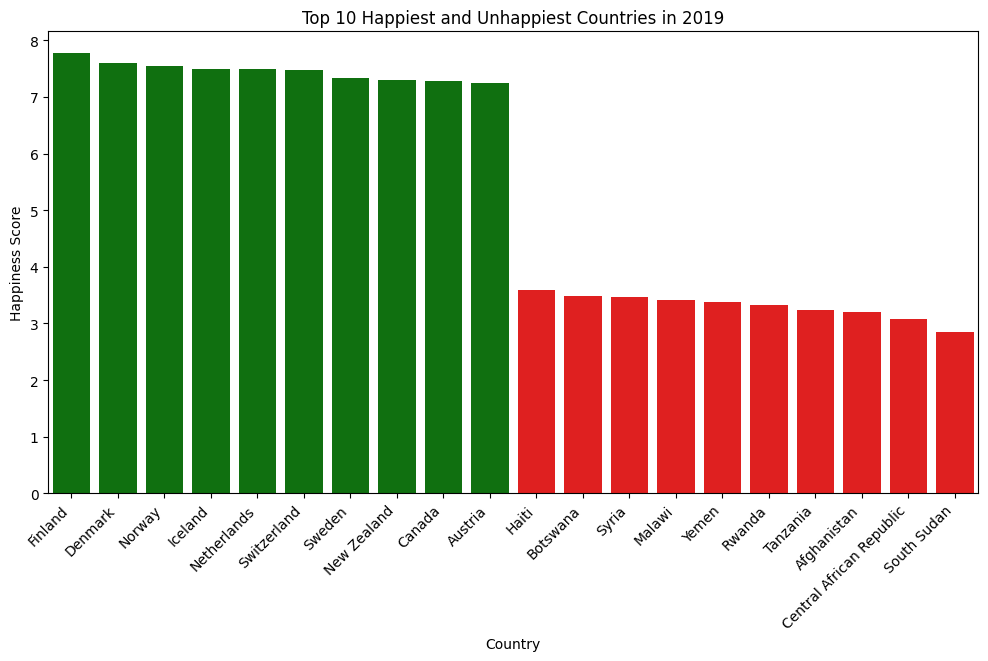

In [54]:
top10_happy = df19.head(10)
top10_unhappy = df19.tail(10)

top10 = pd.concat([top10_happy, top10_unhappy])

plt.figure(figsize=(12,6))
sns.barplot(x='Country or region', y='Score', data=top10, palette=['green']*10 + ['red']*10)
plt.xticks(rotation=45, ha='right')
plt.title('Top 10 Happiest and Unhappiest Countries in 2019')
plt.xlabel('Country')
plt.ylabel('Happiness Score')

Based on this chart, we can indeed observe that the four happiest countries are indeed Scandinavian countries. South Sudan holds the title of the least happy country

# In search of Dystopia

We have already analyzed which countries have the lowest happiness scores. However, let's consider whether there are countries that score below the world average for all six factors.

In [55]:
factors = ['GDP per capita', 'Social support', 'Healthy life expectancy', 'Freedom to make life choices', 'Generosity', 'Perceptions of corruption']
world_averages = df19[factors].mean()
display(world_averages)
filtered_countries = df19
for factor in factors:
    filtered_countries = filtered_countries[filtered_countries[factor] < world_averages[factor]]

# Check results
if filtered_countries.empty:
    print("No country found with all six factors below the world average.")
else:
    print("Countries with all six factors below the world average:")
    display(filtered_countries[['Country or region', *factors]])

,0
GDP per capita,0.905147
Social support,1.208814
Healthy life expectancy,0.725244
Freedom to make life choices,0.392571
Generosity,0.184846
Perceptions of corruption,0.110603


Countries with all six factors below the world average:


,Country or region,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
98,Ivory Coast,0.569,0.808,0.232,0.352,0.154,0.090
101,Benin,0.393,0.437,0.397,0.349,0.175,0.082
102,Congo (Brazzaville),0.673,0.799,0.508,0.372,0.105,0.093
110,Senegal,0.450,1.134,0.571,0.292,0.153,0.072
121,Mauritania,0.570,1.167,0.489,0.066,0.106,0.088
127,Mali,0.385,1.105,0.308,0.327,0.153,0.052
138,Togo,0.275,0.572,0.410,0.293,0.177,0.085
142,Madagascar,0.274,0.916,0.555,0.148,0.169,0.041
143,Lesotho,0.489,1.169,0.168,0.359,0.107,0.093
145,Zimbabwe,0.366,1.114,0.433,0.361,0.151,0.089


We get twelve countries where each of the factors is below average

Now, let's investigate which country has the lowest scores in individual categories.

In [56]:
worst_countries = {}
for factor in factors:
    worst_country = df19.loc[df19[factor].idxmin(), 'Country or region']  # Get country with minimum value
    worst_countries[factor] = worst_country
    value = df19.loc[df19[factor].idxmin(), factor]

worst_countries

for factor, country in worst_countries.items():
    print(f"Worst in {factor}: {country}, with {value}")

Worst in GDP per capita: Somalia, with 0.0
Worst in Social support: Central African Republic, with 0.0
Worst in Healthy life expectancy: Swaziland, with 0.0
Worst in Freedom to make life choices: Afghanistan, with 0.0
Worst in Generosity: Greece, with 0.0
Worst in Perceptions of corruption: Moldova, with 0.0


We get countries for which the value of the factor is 0.0. Therefore, we can suspect that this is due to missing data in the dataset.

# Corelation between factors and factors analysis



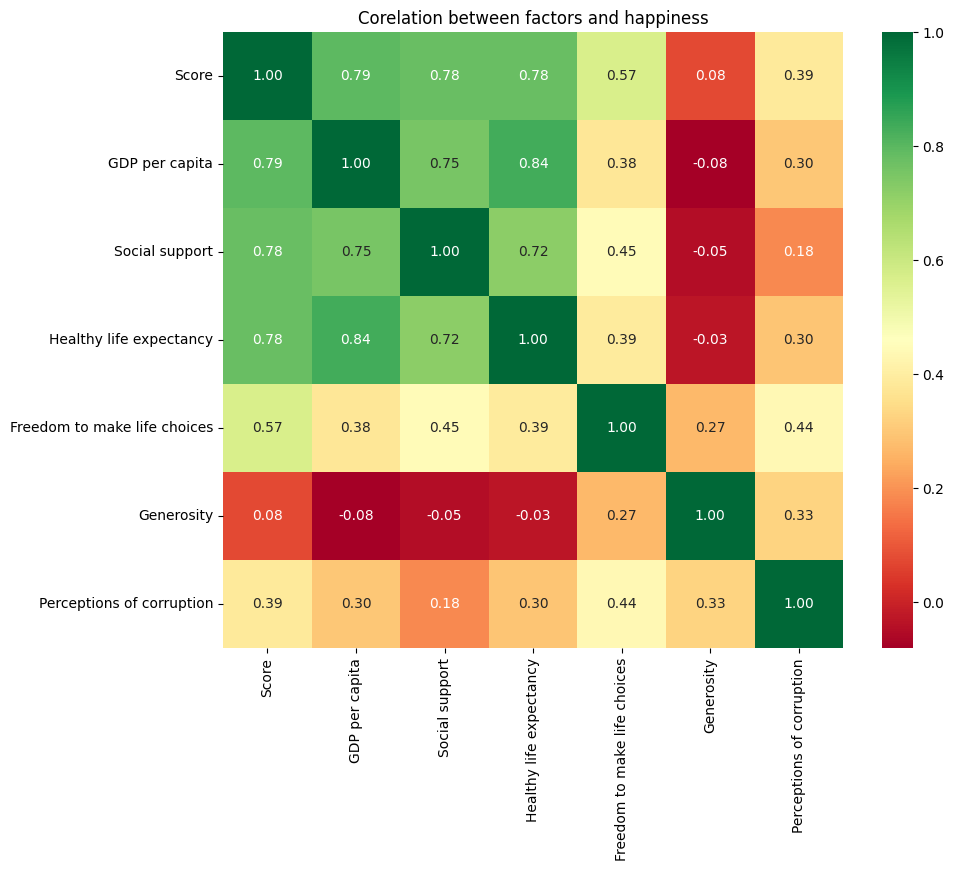

In [57]:

cols = ['Score', 'GDP per capita', 'Social support', 'Healthy life expectancy',
        'Freedom to make life choices', 'Generosity', 'Perceptions of corruption']

corr_matrix = df19[cols].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='RdYlGn', fmt=".2f")
plt.title('Corelation between factors and happiness')
plt.show()

There is a strong correlation between the overall level of happiness and GDP per capita, Social support, Healthy life expectancy, and Freedom to make life choices. Interestingly, we can observe that in the case of Generosity, there is a negative correlation with GDP per capita, Social support, and Healthy life expectancy.

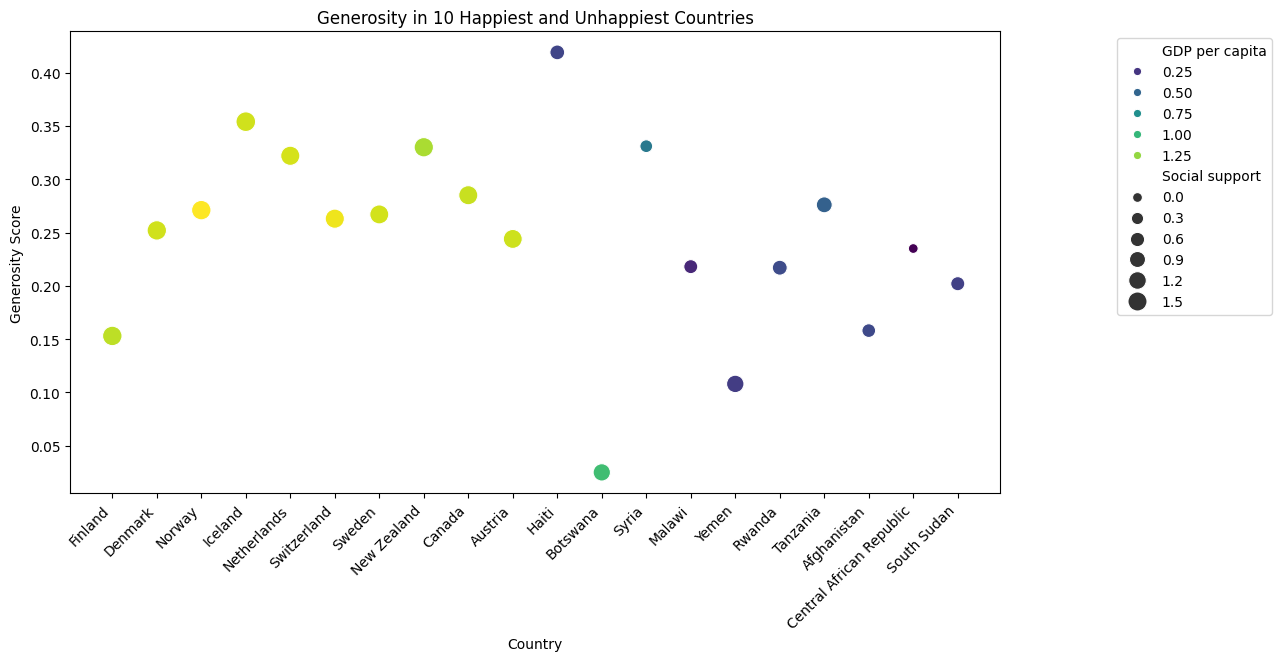

In [58]:
plt.figure(figsize=(12, 6))
sns.scatterplot(x='Country or region', y='Generosity', data=top10,
                hue='GDP per capita', size='Social support',
                palette='viridis', sizes=(50, 200))
plt.xticks(rotation=45, ha='right')
plt.title('Generosity in 10 Happiest and Unhappiest Countries')
plt.xlabel('Country')
plt.ylabel('Generosity Score')
plt.legend(loc='upper right', bbox_to_anchor=(1.3, 1))
plt.show()

The chart confirms what the heatmap has shown us. Less happy countries have a high generosity score. It is worth paying attention to two countries: Haiti, which despite being one of the least happy countries achieves a surprisingly high generosity score, and Botswana, which despite having a higher GDP and Social support, achieves a generosity score close to 0

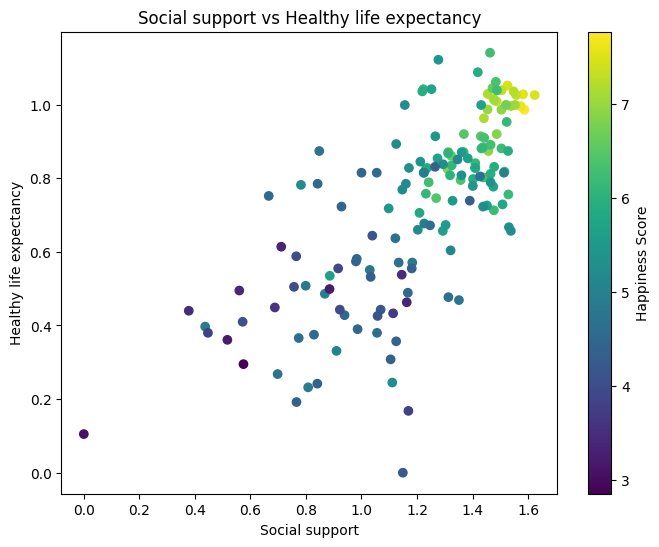

In [59]:
plt.figure(figsize=(8, 6))
plt.scatter(df19['Social support'], df19['Healthy life expectancy'], c=df19['Score'], cmap='viridis')
plt.title('Social support vs Healthy life expectancy')
plt.xlabel('Social support')
plt.ylabel('Healthy life expectancy')
_ = plt.colorbar(label='Happiness Score')

With the increase in Social support, Healthy life expectancy is much higher. Therefore, it can be concluded that social support is one of the factors influencing average life expectancy in a country.

In [60]:
data = dict(type = 'choropleth',
            locations = df19['Country or region'],
            locationmode = 'country names',
            autocolorscale = False,
            colorscale = 'Blues',
            text = df19['Country or region'],
            z = df19['Freedom to make life choices'],
            colorbar = {'title':'Freedom','len':0.75,'lenmode':'fraction'})

happiness_map = gobj.Figure(data=[data])

happiness_map.update_layout(title_text = 'Freedom to make life choices by Country in year 2019')

iplot(happiness_map)

To a large extent, the Freedom to make life choices map overlaps with the map showing the happiness index. However, we can see some data here that are somewhat suspicious. For example, China has a high freedom to make life choices index

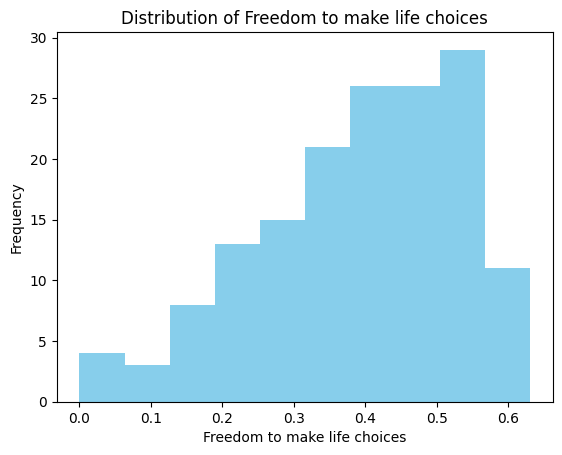

In [61]:
plt.hist(df19['Freedom to make life choices'], color='skyblue')
plt.xlabel('Freedom to make life choices')
plt.ylabel('Frequency')
plt.title('Distribution of Freedom to make life choices')
plt.show()

The results show that most countries have high Freedom to make life choices.

# Poland

How does this data relate to Poland? The dataset provides access to readings from 2015-2019, so let's analyze how the Polish score changed during this period.

In [62]:
poland = []
for df in collection:
    poland.append(df[df['Country'] == 'Poland'] if 'Country' in df.columns else df[df['Country or region'] == 'Poland'])

poland

[   Country                      Region  Happiness Rank  Happiness Score  \
 59  Poland  Central and Eastern Europe              60            5.791   
 
     Standard Error  Economy (GDP per Capita)   Family  \
 59         0.04263                   1.12555  1.27948   
 
     Health (Life Expectancy)  Freedom  Trust (Government Corruption)  \
 59                   0.77903  0.53122                        0.04212   
 
     Generosity  Dystopia Residual  
 59     0.16759            1.86565  ,
    Country                      Region  Happiness Rank  Happiness Score  \
 56  Poland  Central and Eastern Europe              57            5.835   
 
     Lower Confidence Interval  Upper Confidence Interval  \
 56                      5.749                      5.921   
 
     Economy (GDP per Capita)   Family  Health (Life Expectancy)  Freedom  \
 56                   1.24585  1.04685                   0.69058   0.4519   
 
     Trust (Government Corruption)  Generosity  Dystopia Residual  
 56

Text(0, 0.5, 'Score')

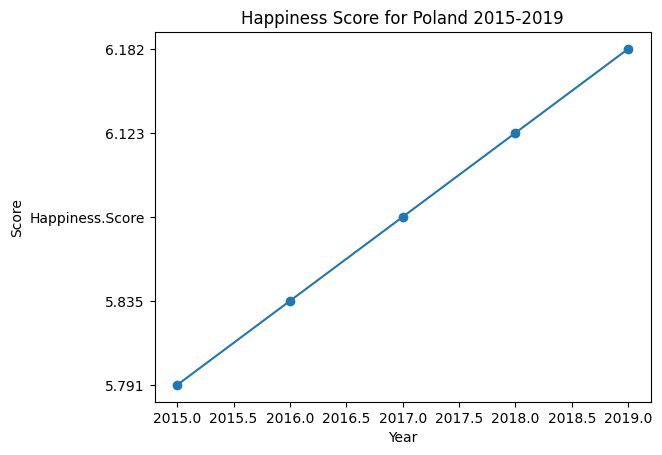

In [63]:
years = range(2015, 2020)
scores = [df['Happiness Score'].values[0] if 'Happiness Score' in df.columns
          else df['Score'].values[0] if 'Score' in df.columns
          else "Happiness.Score" for df in poland]
plt.plot(years, scores, marker='o')
plt.title('Happiness Score for Poland 2015-2019')
plt.xlabel('Year')
plt.ylabel('Score')

The level of happiness in Poland is increasing linearly over the years